In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
average_rent_df = pd.read_csv("Resources/Average Rents_Concat.csv").dropna()
average_rent_df = average_rent_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
average_rent_df = average_rent_df[(average_rent_df["Total"]!=0)]
average_rent_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,783.0,943.0,0.0,1166.0,2018
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,664.0,829.0,1049.0,1002.0,941.0,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,743.0,0.0,576.0,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,762.0,773.0,881.0,959.0,839.0,2018
5,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Apt & Other,0.0,720.0,715.0,677.0,709.0,2018


In [19]:
average_rent_df = average_rent_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
# average_rent_df.head()

In [20]:
average_rent_trend_df = average_rent_df[['Province','Year','Total']]

provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]

average_rent_trend_df = average_rent_trend_df[(average_rent_trend_df['Province'].isin(provinces_for_trend))]

average_rent_trend_df = pd.pivot_table(average_rent_trend_df, index='Year', columns='Province', values='Total', aggfunc='mean', fill_value=0).reset_index()

average_rent_trend_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]

average_rent_trend_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,1119.910256,1333.500000,1173.645946,757.714286,1035.926829
1,2019,1145.673077,1406.594340,1240.425068,811.640000,1043.400000
2,2020,1154.246753,1446.194444,1309.454802,856.005102,1062.500000
3,2021,1171.269737,1503.926606,1361.732353,879.326203,1087.512821
4,2022,1234.600000,1655.522936,1442.713018,966.394118,1148.658537


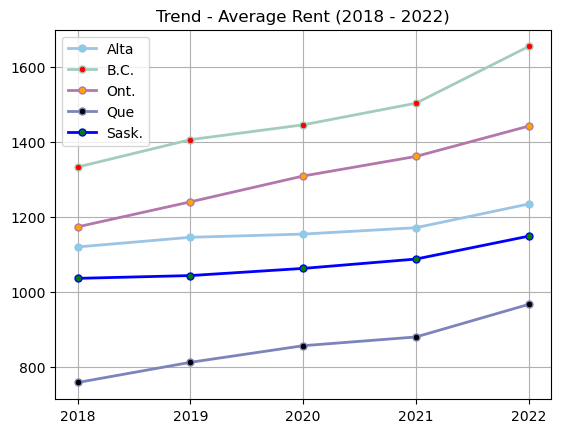

In [21]:
#plot Rent Trend:
plt.plot( 'Year', 'Alta', data=average_rent_trend_df, marker='o', markerfacecolor='skyblue', markersize=5, color='#9cc4e4', linewidth=2)
plt.plot( 'Year', 'B.C.', data=average_rent_trend_df, marker='o', markerfacecolor='red', markersize=5, color='#a4ccbb', linewidth=2)

plt.plot( 'Year', 'Ont.', data=average_rent_trend_df, marker='o', markerfacecolor='orange', markersize=5, color='#b477ac', linewidth=2)
plt.plot( 'Year', 'Que', data=average_rent_trend_df, marker='o', markerfacecolor='black', markersize=5, color='#7c84bc', linewidth=2)
plt.plot( 'Year', 'Sask.', data=average_rent_trend_df, marker='o', markerfacecolor='green', markersize=5, color='blue', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.title("Trend - Average Rent (2018 - 2022)")
plt.grid()
plt.legend()

plt.savefig('Resources/output/average_rent/Trend_Average_Rent.png')

plt.show()

In [22]:
average_rent_df_2022 = average_rent_df[(average_rent_df['Year']==2022)]

average_rent_summary_bachelor = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["Bachelor"]
average_rent_summary_one_bedroom = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["1 Bedroom"]
average_rent_summary_two_bedroom = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["2 Bedroom"]
average_rent_summary_three_bedroom_plus = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["3 Bedroom +"]
average_rent_summary_three_bedroom_total = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["Total"]  

average_rent_summary_2022 = pd.concat([average_rent_summary_bachelor, average_rent_summary_one_bedroom, average_rent_summary_two_bedroom,
                                   average_rent_summary_three_bedroom_plus, average_rent_summary_three_bedroom_total]
                                  , axis=1)

average_rent_summary_2022.columns = ["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom +","Total"]
average_rent_summary_2022

,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
Province,,,,,
Alta,283.780000,797.900000,1126.606667,848.740000,1234.600000
B.C.,800.422018,1283.844037,1731.036697,1300.550459,1655.522936
Man.,410.190476,702.500000,1026.904762,1035.809524,1198.166667
N.B.,285.238095,780.619048,1069.809524,647.714286,1027.380952
N.S.,382.240000,914.320000,1370.200000,1154.960000,1358.840000
Nfld.Lab.,313.800000,491.600000,761.200000,579.000000,939.000000
Ont.,534.603550,1106.215976,1398.991124,1042.807692,1442.713018
Que,336.594118,674.076471,939.035294,826.864706,966.394118
Sask.,444.097561,981.804878,1112.000000,701.975610,1148.658537


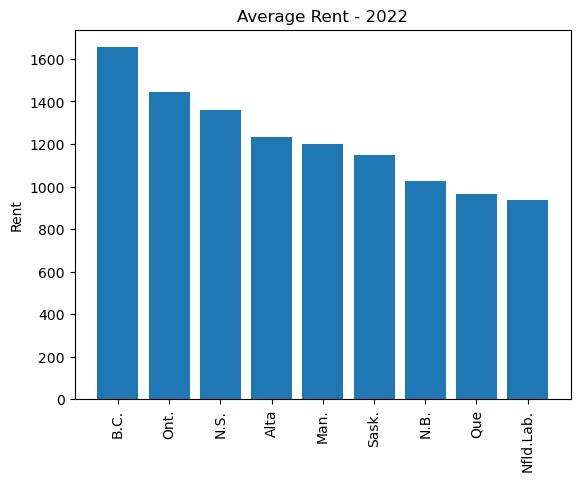

In [23]:
#plot Total:
average_rent_summary = average_rent_summary_2022.sort_values(by="Total", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['Total']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent - 2022")

plt.savefig('Resources/output/average_rent/Bar_Average_Rent_2022.png')

plt.show()

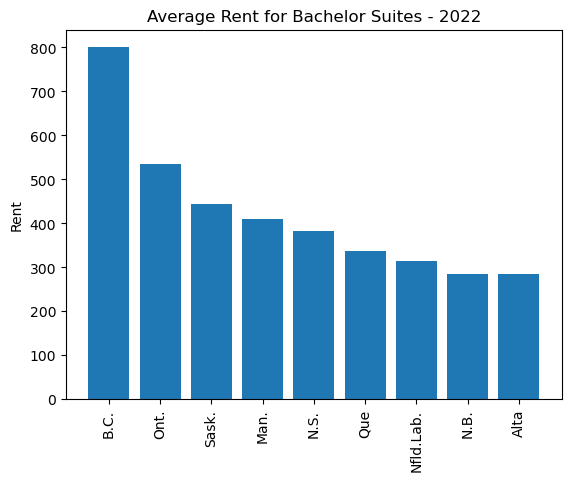

In [24]:
#plot 1:
average_rent_summary = average_rent_summary_2022.sort_values(by="Bachelor", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['Bachelor']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for Bachelor Suites - 2022")

plt.savefig('Resources/output/average_rent/Bar_Average_Rent_Bachelor_2022.png')

plt.show()

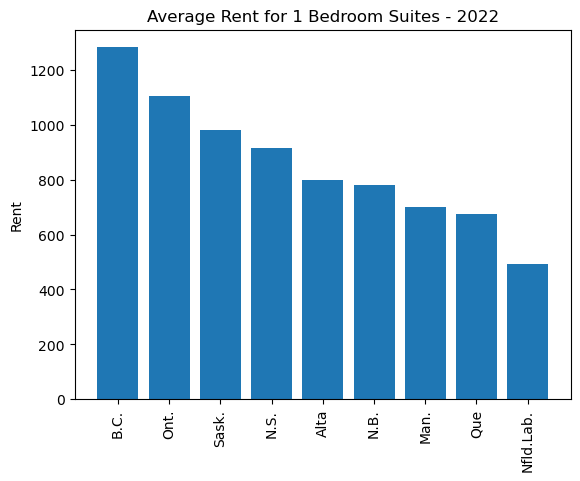

In [25]:
#plot 2:
average_rent_summary = average_rent_summary_2022.sort_values(by="1 Bedroom", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['1 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for 1 Bedroom Suites - 2022")

plt.savefig('Resources/output/average_rent/Bar_Average_Rent_1_br_2022.png')

plt.show()

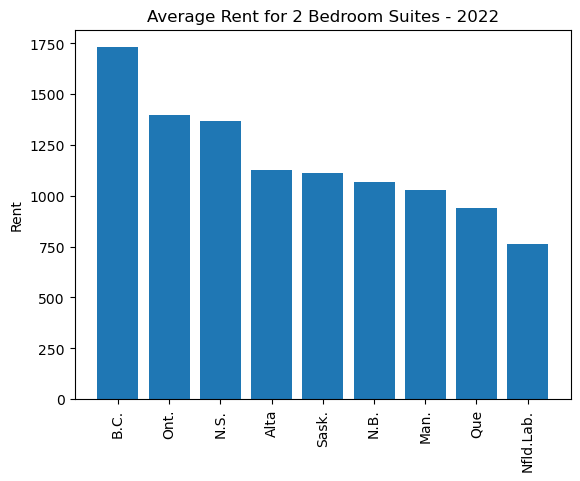

In [26]:
#plot 3:
average_rent_summary = average_rent_summary_2022.sort_values(by="2 Bedroom", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['2 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for 2 Bedroom Suites - 2022")

plt.savefig('Resources/output/average_rent/Bar_Average_Rent_2_br_2022.png')

plt.show()

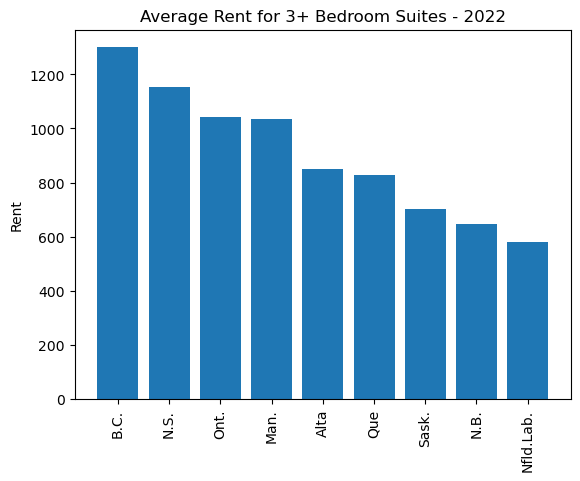

In [27]:
#plot 4:
average_rent_summary = average_rent_summary_2022.sort_values(by="3 Bedroom +", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['3 Bedroom +']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for 3+ Bedroom Suites - 2022")

plt.savefig('Resources/output/average_rent/Bar_Average_Rent_3_br_2022.png')

plt.show()

In [28]:
average_rent_summary_2022 = average_rent_summary_2022.reset_index()
average_rent_summary_2022

,Province,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
0,Alta,283.780000,797.900000,1126.606667,848.740000,1234.600000
1,B.C.,800.422018,1283.844037,1731.036697,1300.550459,1655.522936
2,Man.,410.190476,702.500000,1026.904762,1035.809524,1198.166667
3,N.B.,285.238095,780.619048,1069.809524,647.714286,1027.380952
4,N.S.,382.240000,914.320000,1370.200000,1154.960000,1358.840000
5,Nfld.Lab.,313.800000,491.600000,761.200000,579.000000,939.000000
6,Ont.,534.603550,1106.215976,1398.991124,1042.807692,1442.713018
7,Que,336.594118,674.076471,939.035294,826.864706,966.394118
8,Sask.,444.097561,981.804878,1112.000000,701.975610,1148.658537


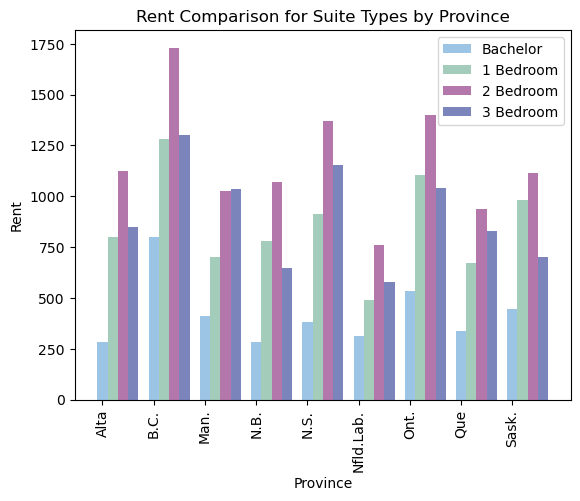

In [29]:
index = np.arange(5)
bar_width = 0.20

fig, ax = plt.subplots()
ax.bar(average_rent_summary_2022.index, average_rent_summary_2022['Bachelor'], bar_width, color="#9cc4e4", label="Bachelor")
ax.bar(average_rent_summary_2022.index + 0.20, average_rent_summary_2022['1 Bedroom'], bar_width, color="#a4ccbb", label="1 Bedroom")
ax.bar(average_rent_summary_2022.index + 0.40, average_rent_summary_2022['2 Bedroom'], bar_width, color="#b477ac", label="2 Bedroom")
ax.bar(average_rent_summary_2022.index + 0.60, average_rent_summary_2022['3 Bedroom +'], bar_width, color="#7c84bc", label="3 Bedroom")

ax.set_xlabel('Province')
ax.set_ylabel('Rent')
ax.set_title('Rent Comparison for Suite Types by Province')
ax.set_xticks(average_rent_summary_2022.index)
ax.set_xticklabels(["Alta","B.C.","Man.","N.B.","N.S.","Nfld.Lab.","Ont.","Que","Sask."], rotation=90)
ax.legend(loc='upper right')

plt.savefig('Resources/output/average_rent/Bar_suite_type_rent_bar.png')

plt.show()

In [30]:
province = ['Alta','Ont.','Que','B.C.']
average_rent_summary_bachelor = average_rent_summary_2022[average_rent_summary_2022['Province'].isin(province)]
average_rent_summary_bachelor = average_rent_summary_bachelor.sort_values(by="Bachelor", ascending=False)
average_rent_summary_bachelor = average_rent_summary_bachelor.reset_index()

average_rent_summary_one_br = average_rent_summary_2022[average_rent_summary_2022['Province'].isin(province)]
average_rent_summary_one_br = average_rent_summary_one_br.sort_values(by="1 Bedroom", ascending=False)
average_rent_summary_one_br = average_rent_summary_one_br.reset_index()

average_rent_summary_two_br = average_rent_summary_2022[average_rent_summary_2022['Province'].isin(province)]
average_rent_summary_two_br = average_rent_summary_two_br.sort_values(by="2 Bedroom", ascending=False)
average_rent_summary_two_br = average_rent_summary_two_br.reset_index()

average_rent_summary_three_br = average_rent_summary_2022[average_rent_summary_2022['Province'].isin(province)]
average_rent_summary_three_br = average_rent_summary_three_br.sort_values(by="3 Bedroom +", ascending=False)
average_rent_summary_three_br = average_rent_summary_three_br.reset_index()

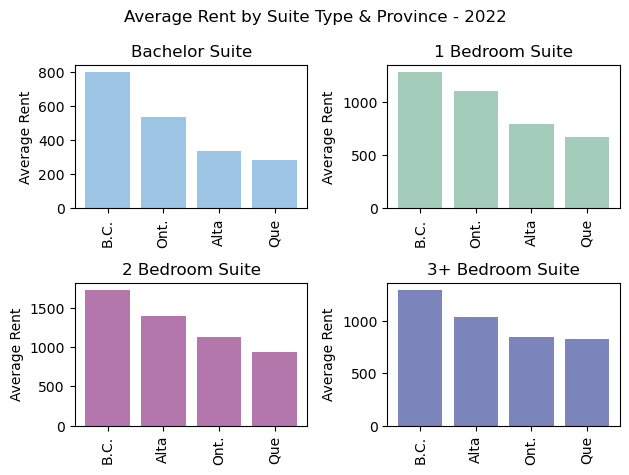

In [31]:
x = average_rent_summary_bachelor.index
y = average_rent_summary_bachelor['Bachelor']

plt.subplot(2, 2, 1)
plt.bar(x,y)

plt.ylabel("Average Rent")
plt.xticks(average_rent_summary_bachelor.index,['B.C.','Ont.','Alta','Que'], rotation=90)
plt.title("Bachelor Suite")
plt.bar(x, y, color="#9cc4e4")

x = average_rent_summary_one_br.index
y = average_rent_summary_one_br['1 Bedroom']

plt.subplot(2, 2, 2)

plt.ylabel("Average Rent")
plt.xticks(average_rent_summary_one_br.index,['B.C.','Ont.','Alta','Que'], rotation=90)
plt.title("1 Bedroom Suite")
plt.bar(x, y, color="#a4ccbb")

x = average_rent_summary_two_br.index
y = average_rent_summary_two_br['2 Bedroom']

plt.subplot(2, 2, 3)

plt.ylabel("Average Rent")
plt.xticks(average_rent_summary_two_br.index,['B.C.','Alta','Ont.','Que'], rotation=90)
plt.title("2 Bedroom Suite")
plt.bar(x, y, color="#b477ac")

x = average_rent_summary_three_br.index
y = average_rent_summary_three_br['3 Bedroom +']

plt.subplot(2, 2, 4)

plt.ylabel("Average Rent")
plt.xticks(average_rent_summary_three_br.index,['B.C.','Alta','Ont.','Que'], rotation=90)
plt.title("3+ Bedroom Suite")
plt.bar(x, y, color="#7c84bc")

plt.suptitle("Average Rent by Suite Type & Province - 2022")

plt.tight_layout()
plt.savefig('Resources/output/average_rent/subplot_bar_suite_type_rent.png')

plt.show()